## Import of VS movie and ROI analysis of time dependence of the scattering

Note this JN requires skvideo to be installed. My observation was that JN could only import the library if JN were started from Anaconda and not directly from a terminal window.

In [328]:
#%matplotlib inline
%matplotlib notebook

## Import routines

In [329]:
import skvideo.io 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import matplotlib.colors as colors
import copy
from itertools import cycle

colors =  cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
symbols = cycle('ovovovovovovovovovovovovovov')

plt.rcParams.update({'font.size': 20})


## Import data from V.S.

In [330]:
MovieFile = '/Users/mf3/Desktop/VanScriver/vs.mp4'
videodata = skvideo.io.vread(MovieFile)  
GrayVideo = skvideo.utils.rgb2gray(videodata)[:,:,:,0]
SuperP = np.sum(GrayVideo,axis=0)

vmax, vmin = np.max(SuperP), np.min(SuperP)
SuperPScaled = np.abs((SuperP - vmin) / (vmax - vmin) * 255)

print(np.min(SuperPScaled),np.max(SuperPScaled))


0.0 255.0


## Origin of conversion factors from pixel to mm

V.S. paper says inside white boundary of image is 19.5 mm

Adobe Ill says this distance is 1014 point.

Adobe Ill says 982 point is same as 400 pixels

So to convert pixel to mm we multiply pixel by 0.047 = (19.5/1014) * (982/400)

In [331]:
ConvertPixelTomm = 0.047
n = len(SuperPScaled[:,0])
m = len(SuperPScaled[0,:])

## Show images of data in raw pixel and converted mm coordinates

<IPython.core.display.Javascript object>


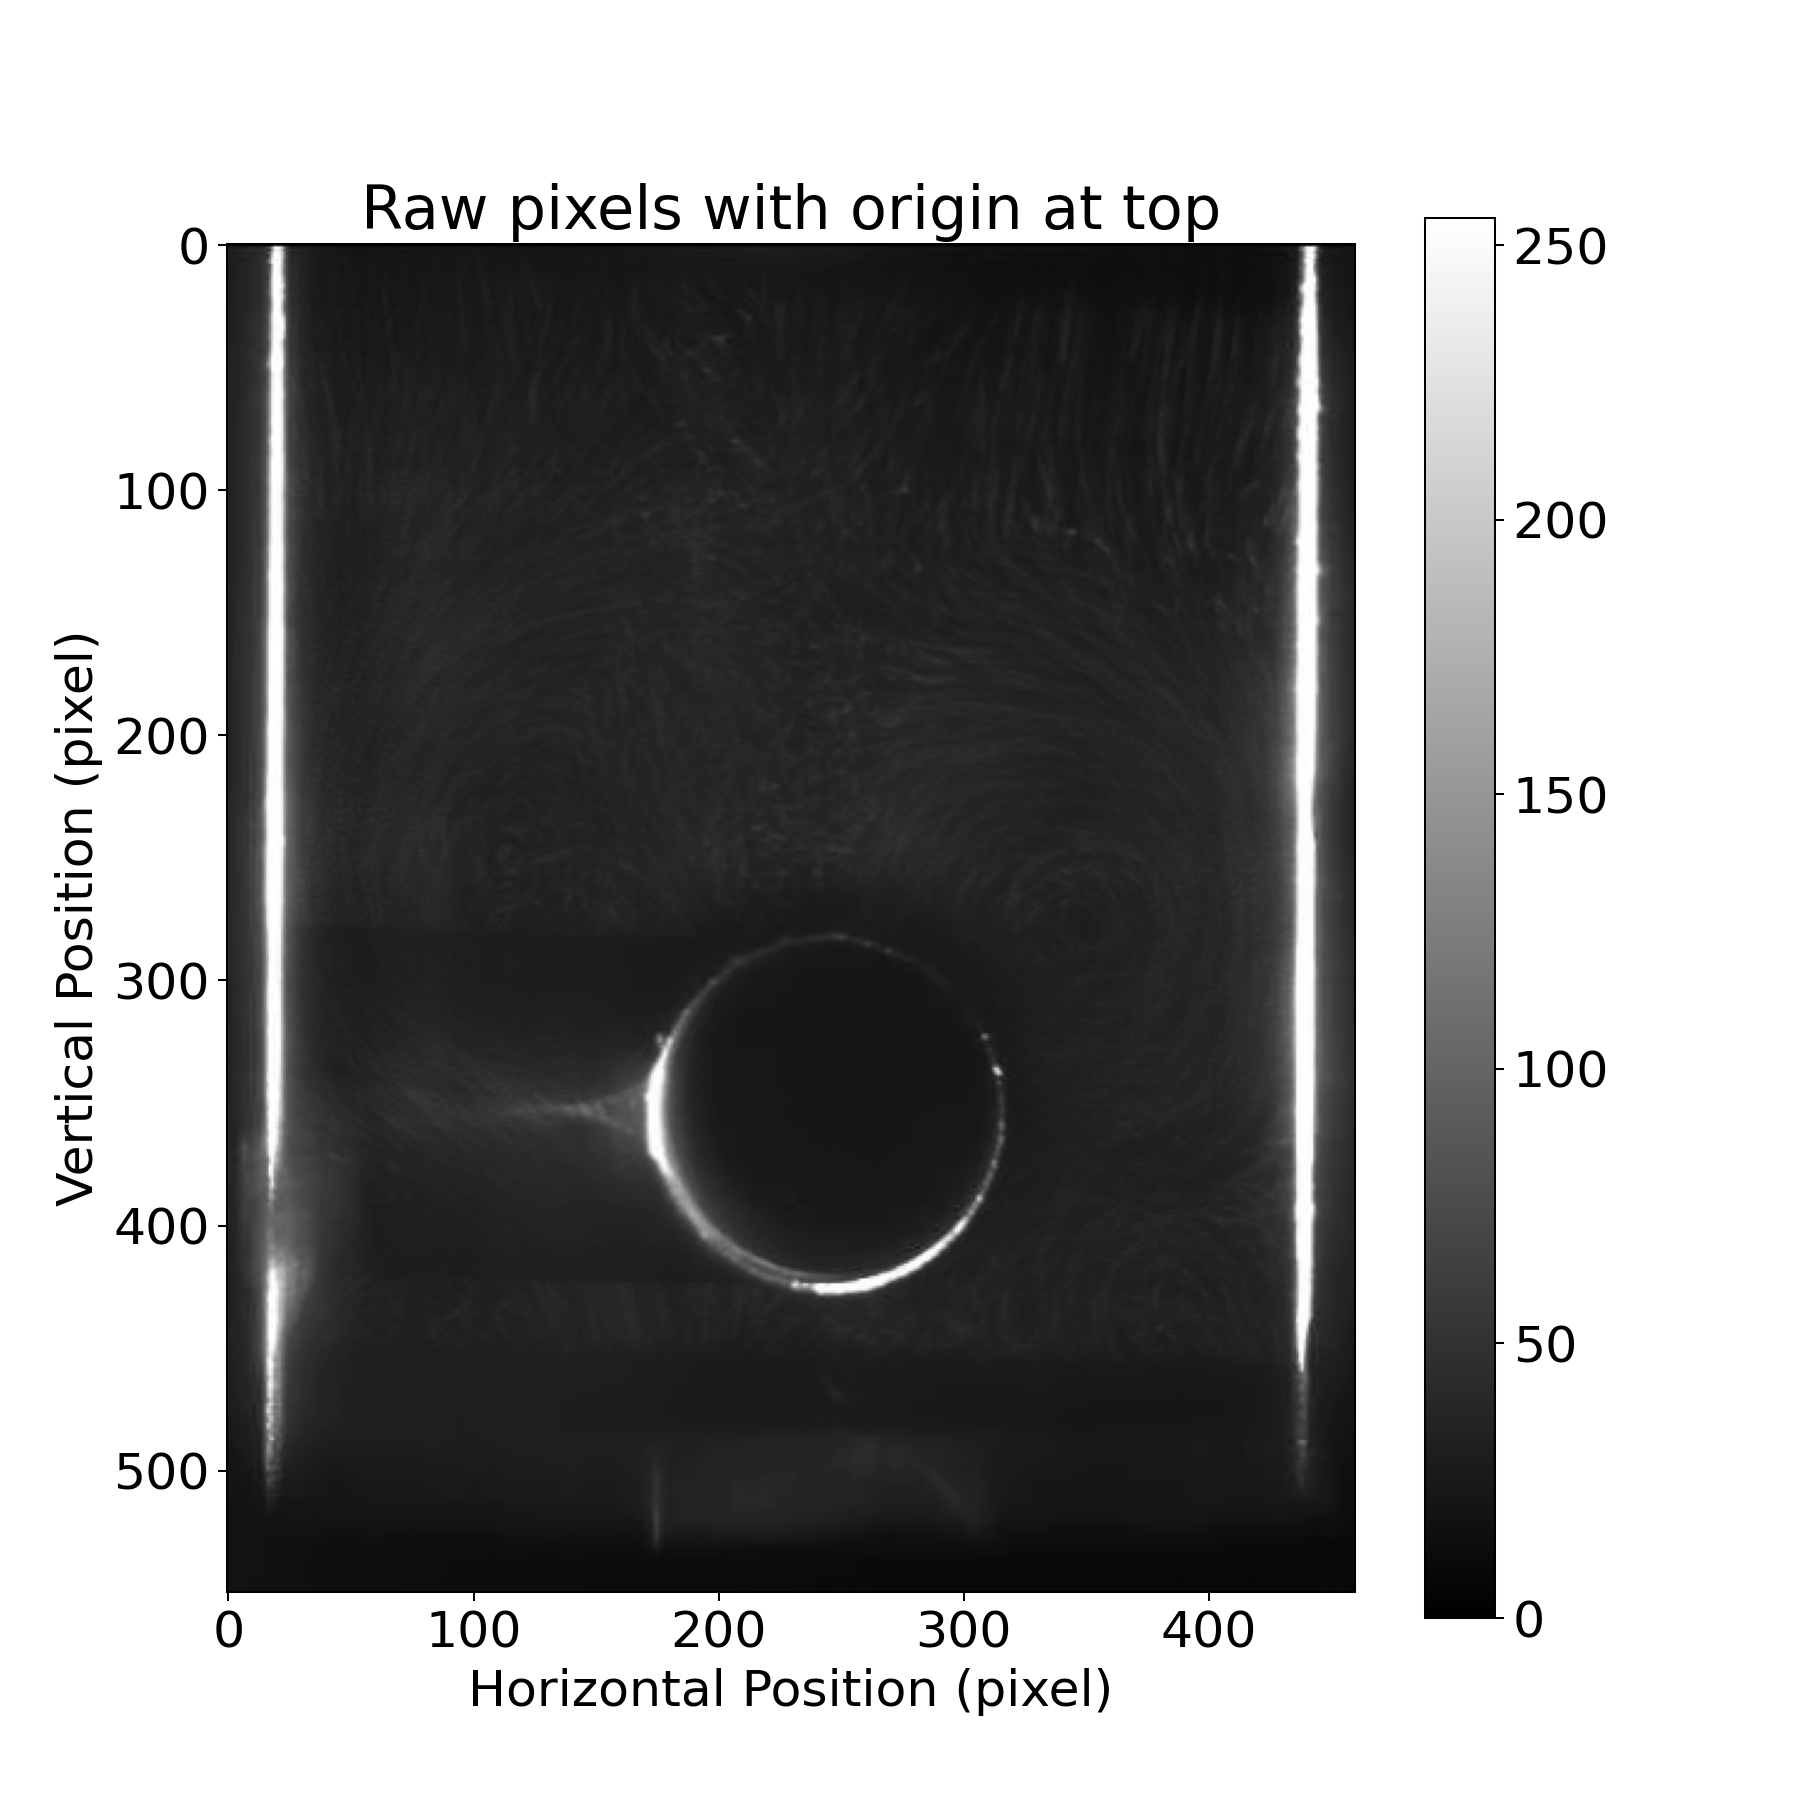

<IPython.core.display.Javascript object>


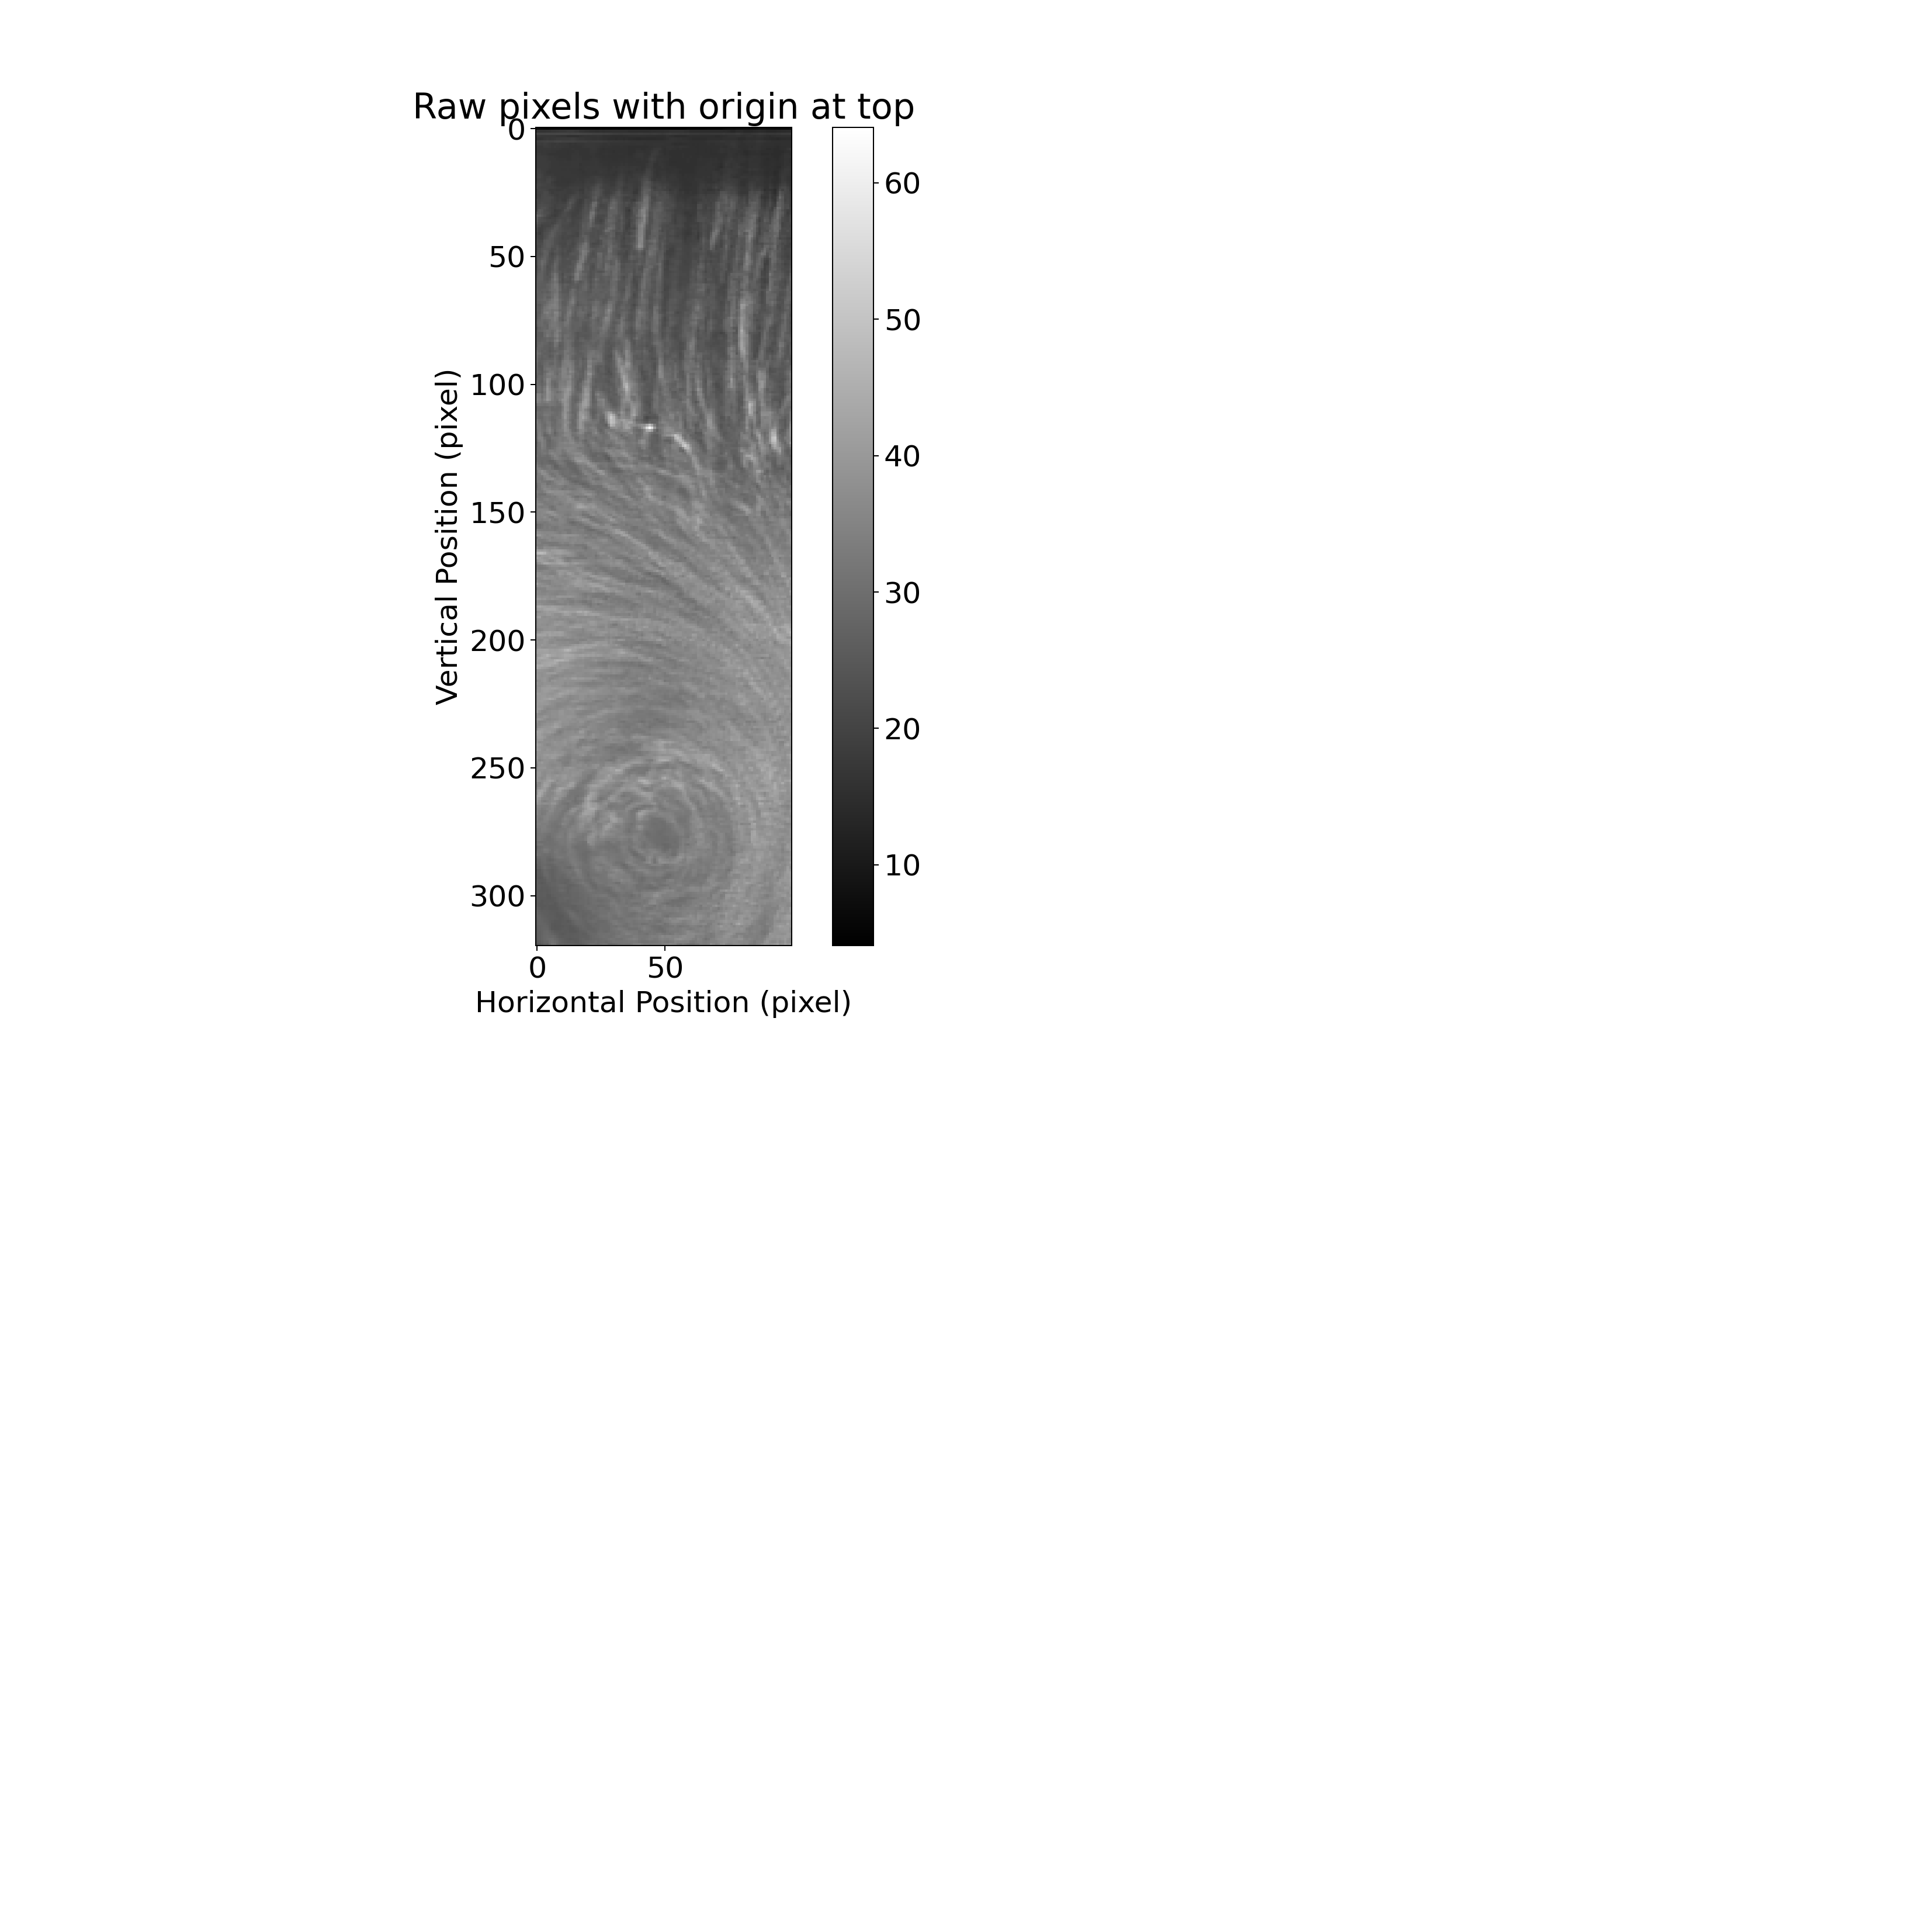

<IPython.core.display.Javascript object>


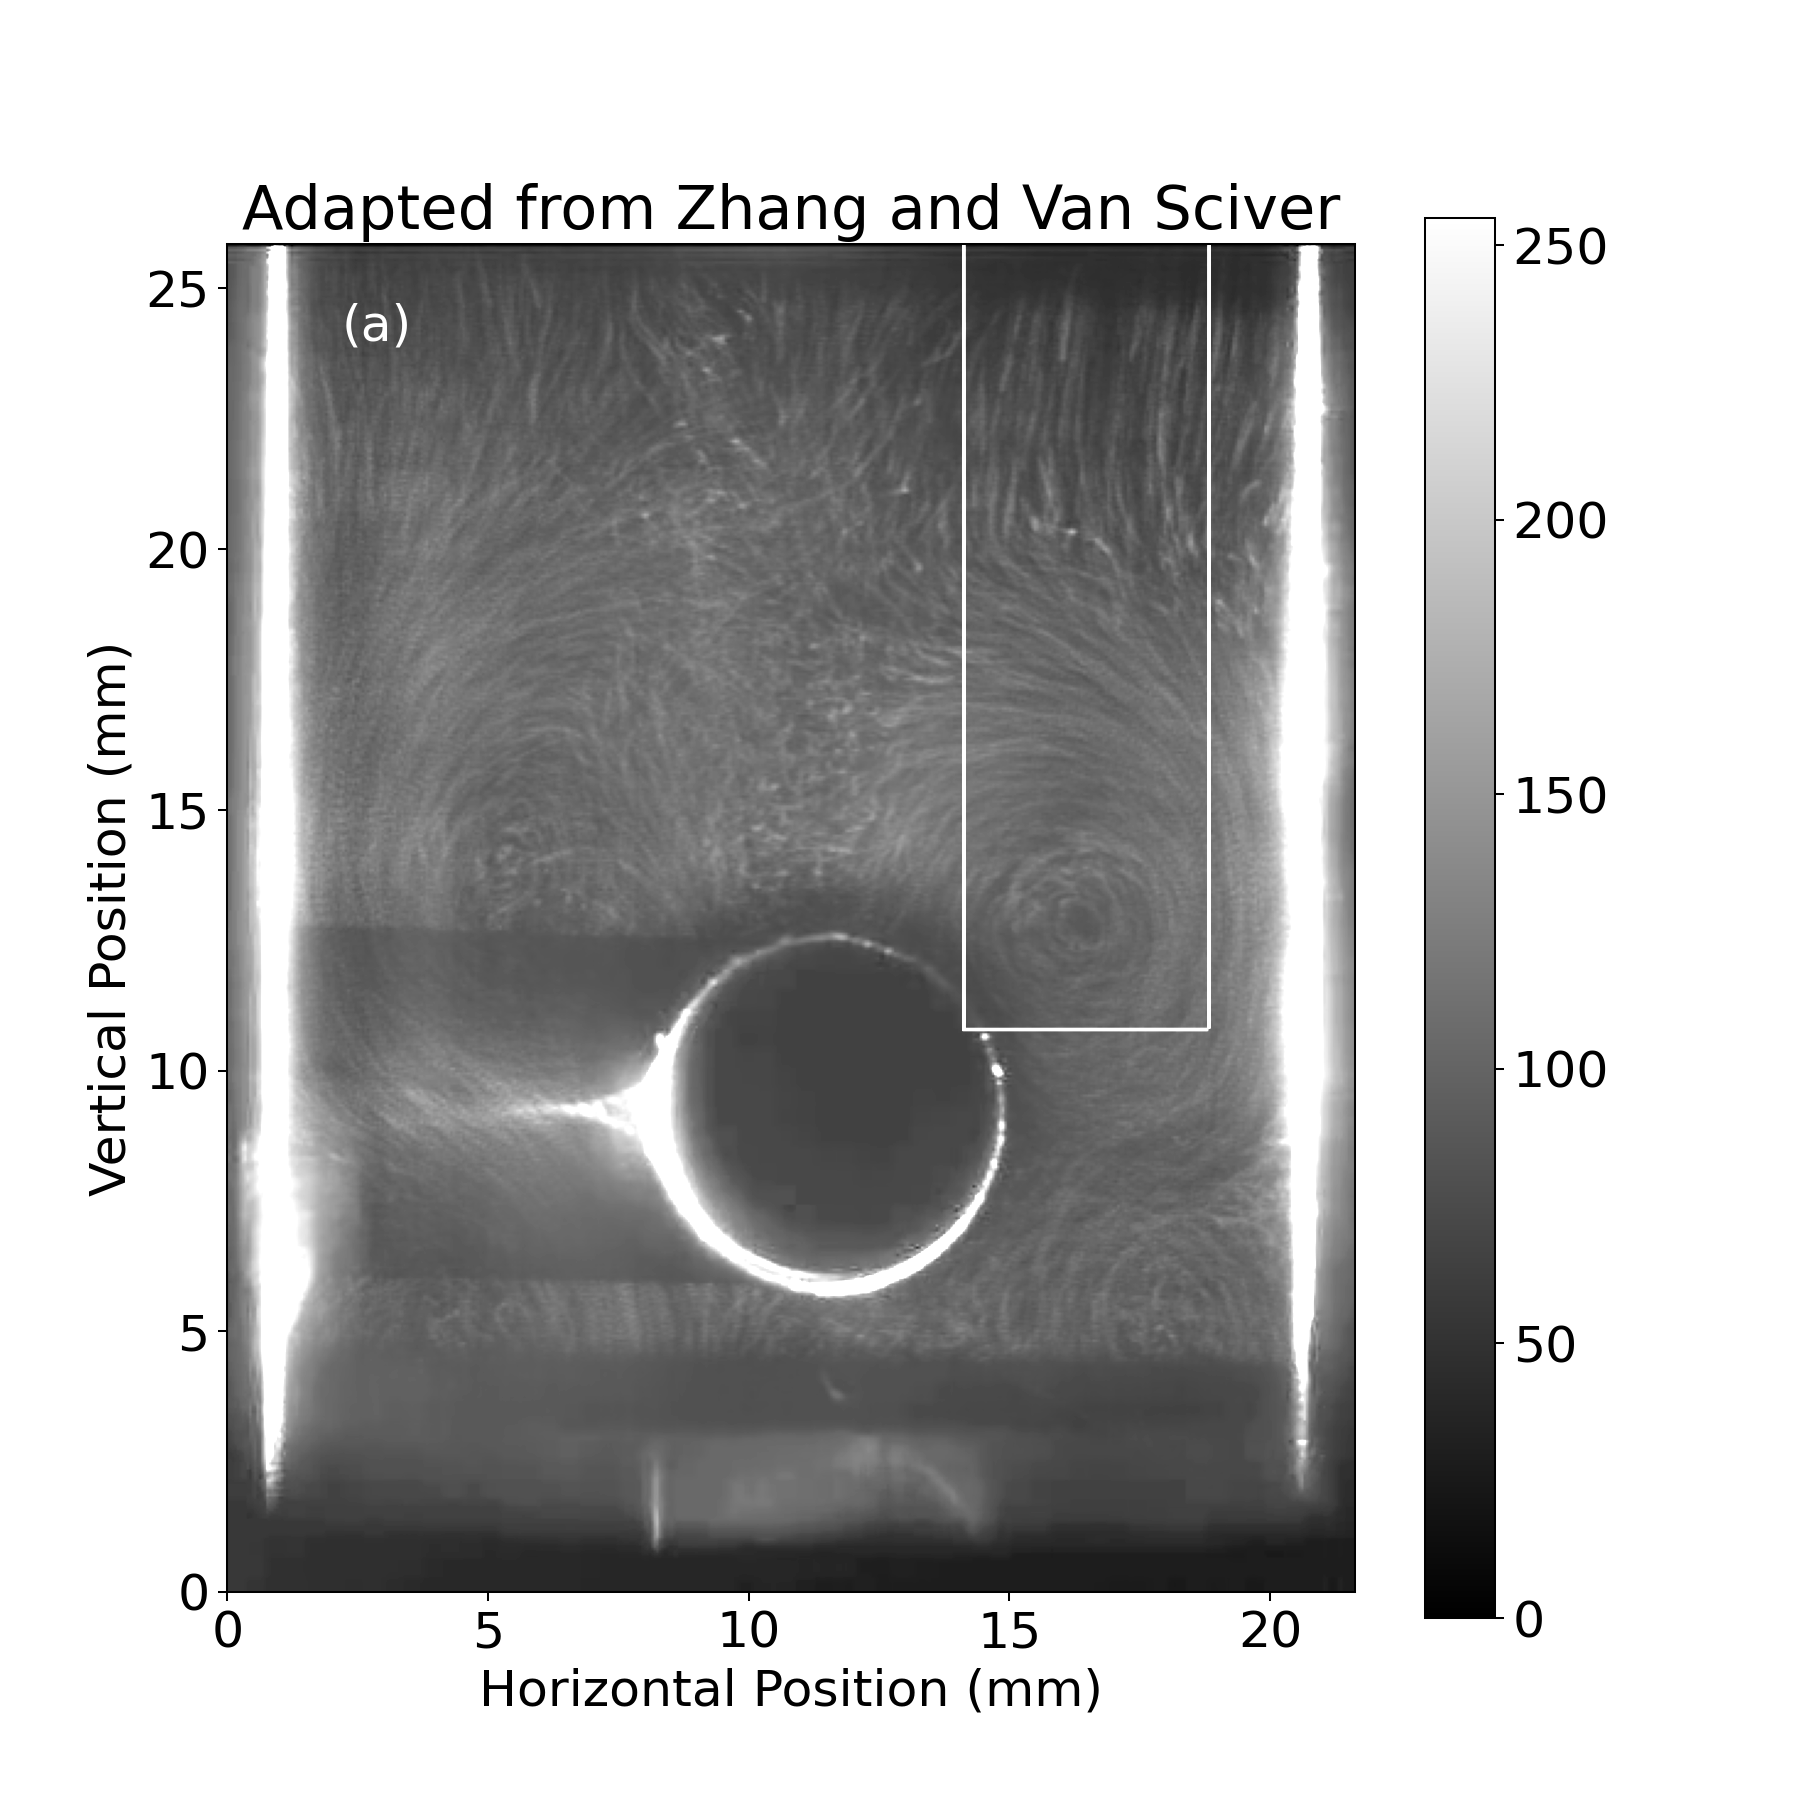

<IPython.core.display.Javascript object>


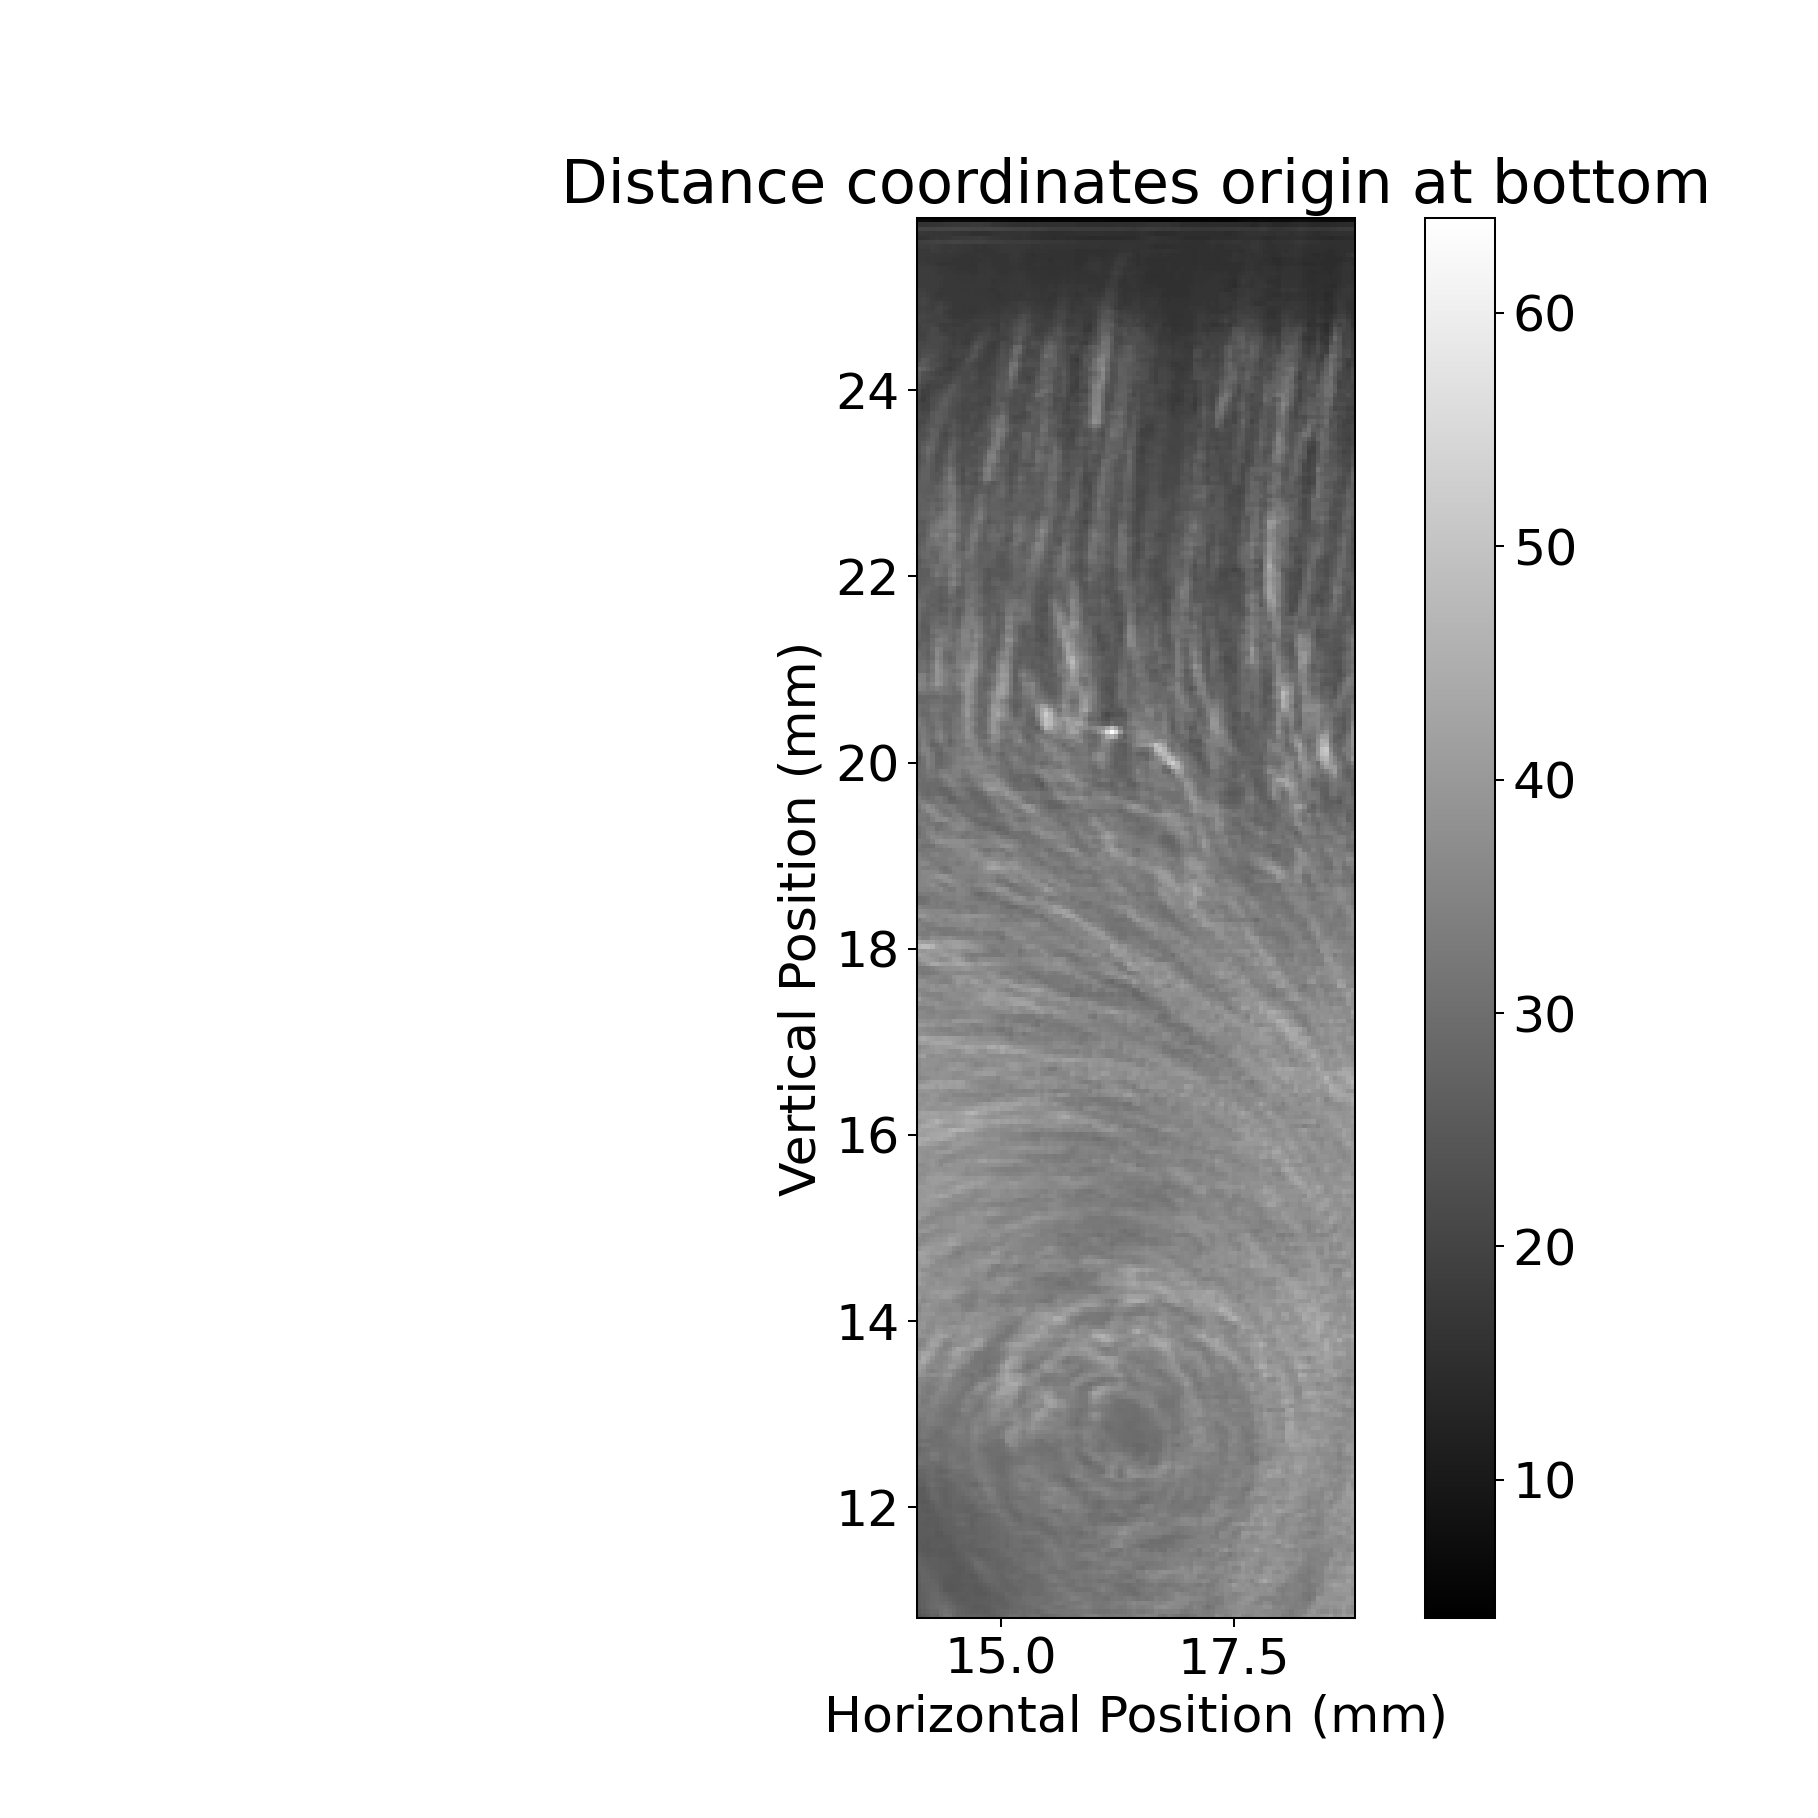

In [332]:
plt.figure(figsize = (10,10))
plt.xlabel('Horizontal Position (pixel)')
plt.ylabel('Vertical Position (pixel)')
plt.title('Raw pixels with origin at top')
plt.imshow(SuperPScaled, cmap='gray')
plt.colorbar()
plt.show()

dxMin = 0 # along the vertical
dxMax = 320
dyMin = 300 # along the horizontal
dyMax = 400

xMin = (n - dxMax) * ConvertPixelTomm
xMax = (n - dxMin) * ConvertPixelTomm
yMin = (dyMin) * ConvertPixelTomm
yMax = (dyMax) * ConvertPixelTomm

MiniP = SuperPScaled[dxMin:dxMax,dyMin:dyMax]

plt.figure(figsize = (10,10))
plt.xlabel('Horizontal Position (pixel)')
plt.ylabel('Vertical Position (pixel)')
plt.title('Raw pixels with origin at top')
plt.imshow(MiniP, cmap='gray')
plt.colorbar()
plt.show()

# now rearrange to put origin at bottom left and convert to mm

OneOff = copy.deepcopy(SuperPScaled)
OneOff = OneOff * 3
OneOff[320,300:400] = np.max(OneOff)
OneOff[0:320,300] = np.max(OneOff)
OneOff[0:320,400] = np.max(OneOff)

plt.figure(figsize = (10,10))
plt.xlabel('Horizontal Position (mm)')
plt.ylabel('Vertical Position (mm)')
plt.title('Adapted from Zhang and Van Sciver')
plt.imshow(np.flip(OneOff,axis=0), cmap='gray', origin='lower', extent=[0,m*ConvertPixelTomm,0,n*ConvertPixelTomm],\
           vmin=0, vmax=255)
plt.text(2.2,24,'(a)',fontsize=20, c = 'white')
plt.colorbar()
plt.show()
plt.savefig('Figure10a.pdf')

plt.figure(figsize = (10,10))
plt.xlabel('Horizontal Position (mm)')
plt.ylabel('Vertical Position (mm)')
plt.title('Distance coordinates origin at bottom')
plt.imshow(np.flip(MiniP,axis=0), cmap='gray', origin='lower', extent=[yMin,yMax,xMin,xMax])
plt.colorbar()
plt.show()




## In the region between just above the eddy center and the beginning of the laminar flow, there are 21-23 high intensity filaments in a distance of 6 mm.  So the spacing is about 0.26(2) mm.

## Define a list of ROI's to sample

<IPython.core.display.Javascript object>


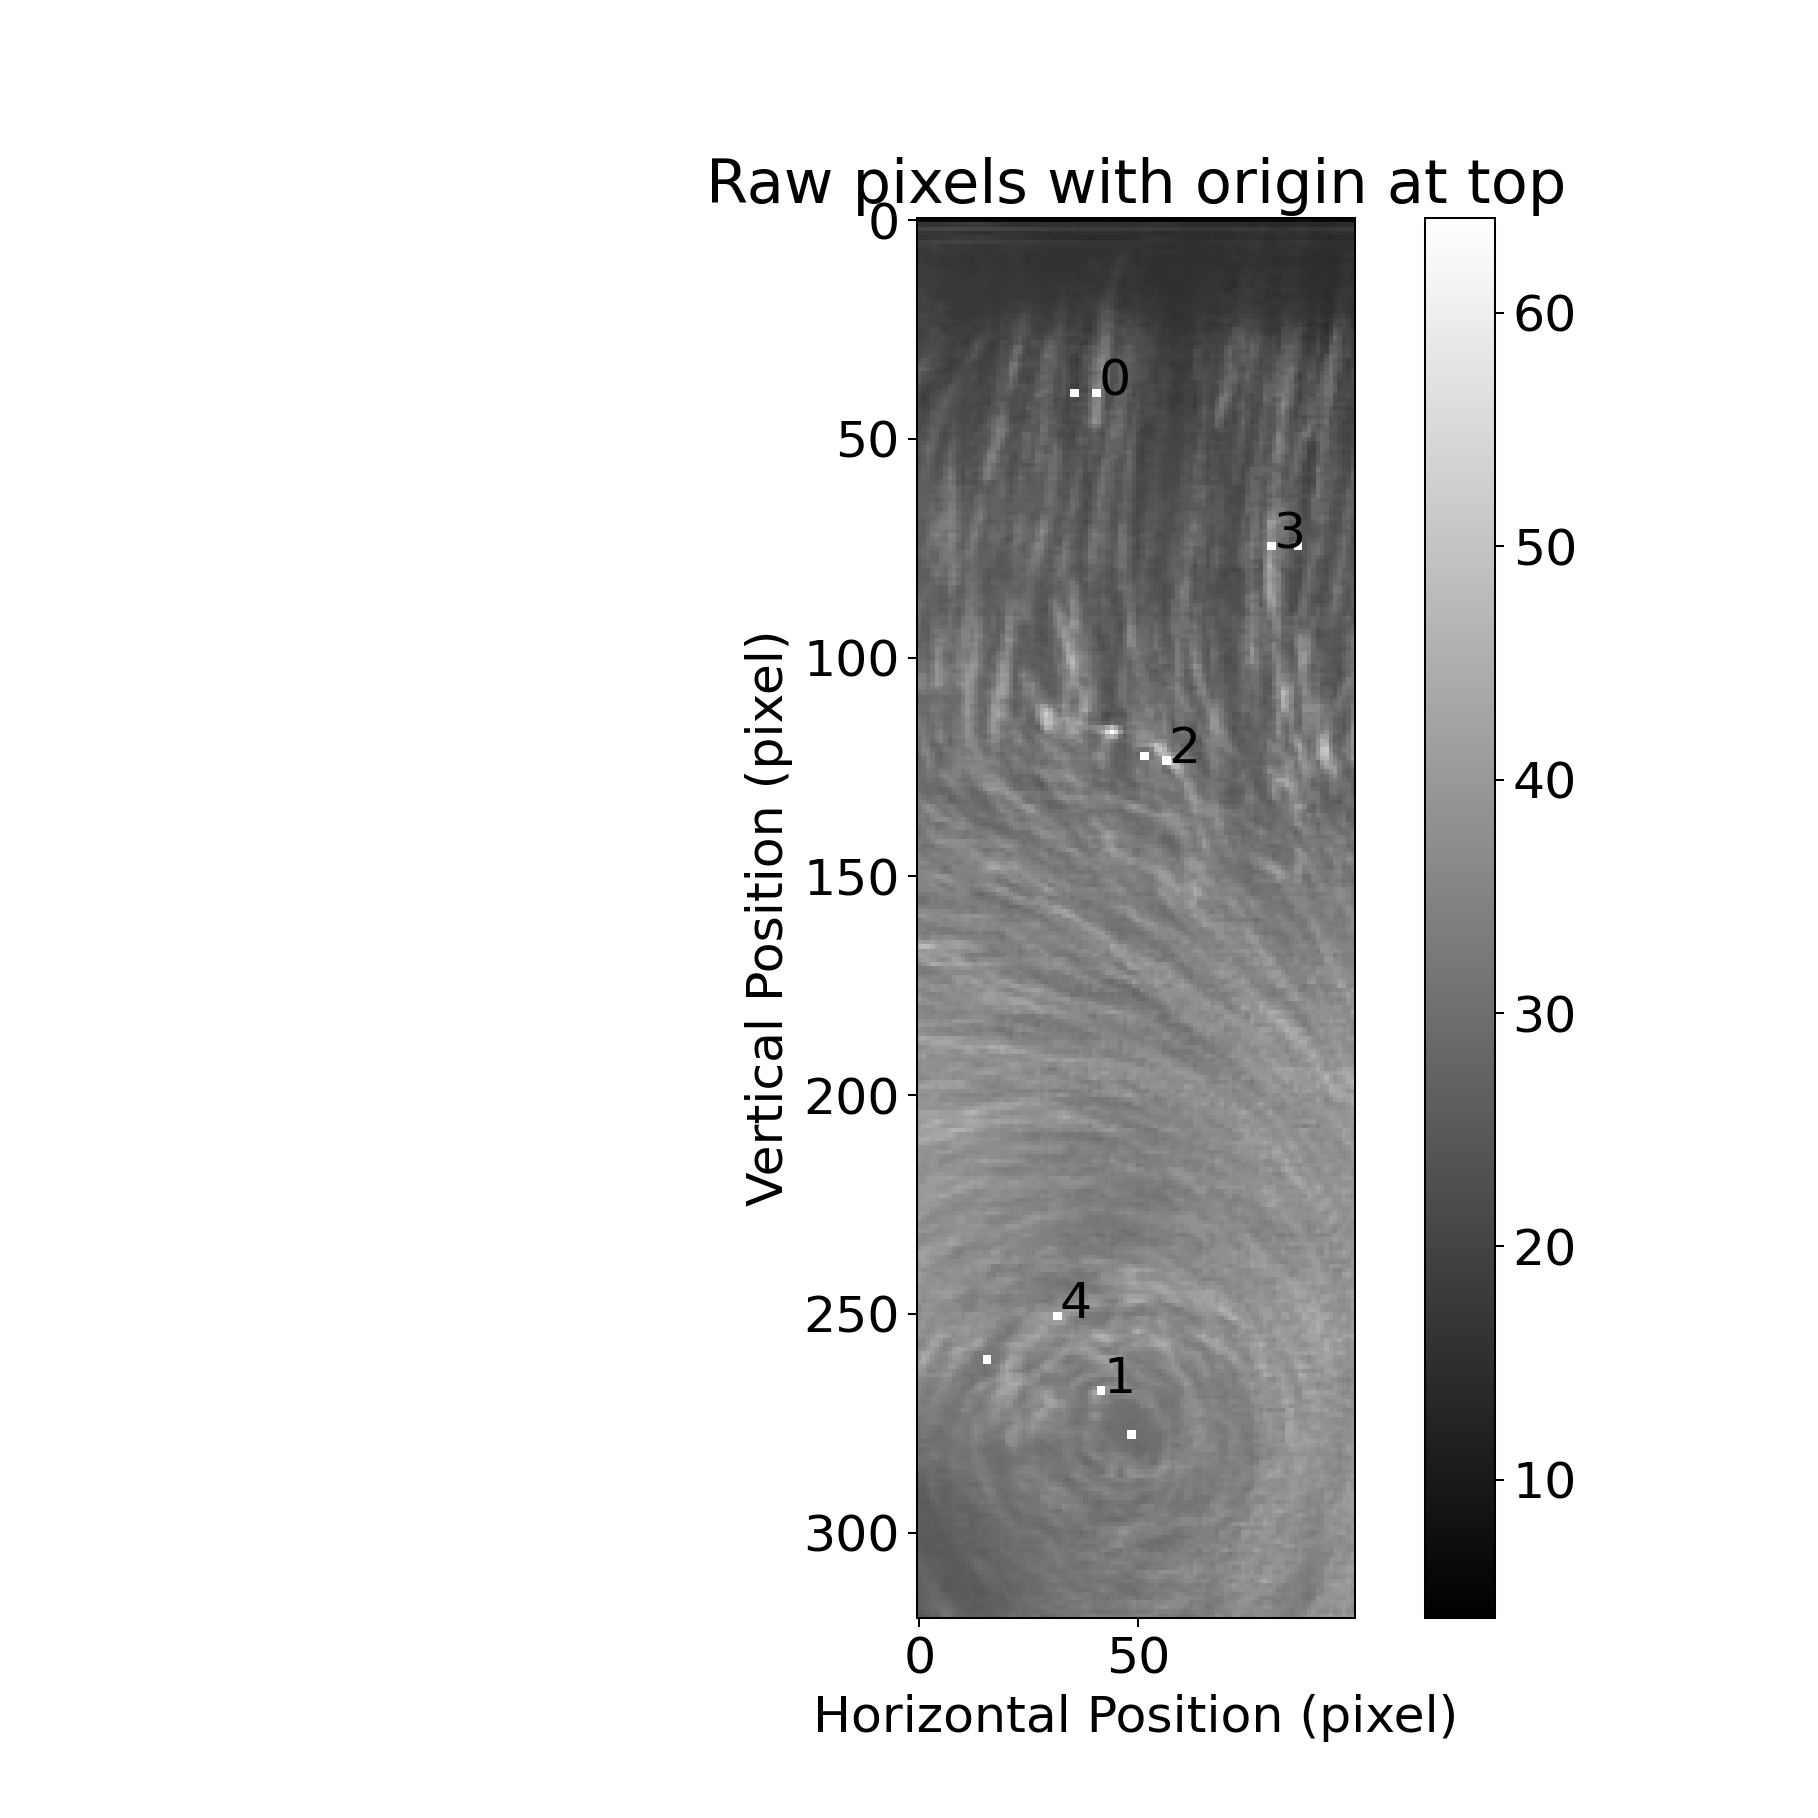

<IPython.core.display.Javascript object>


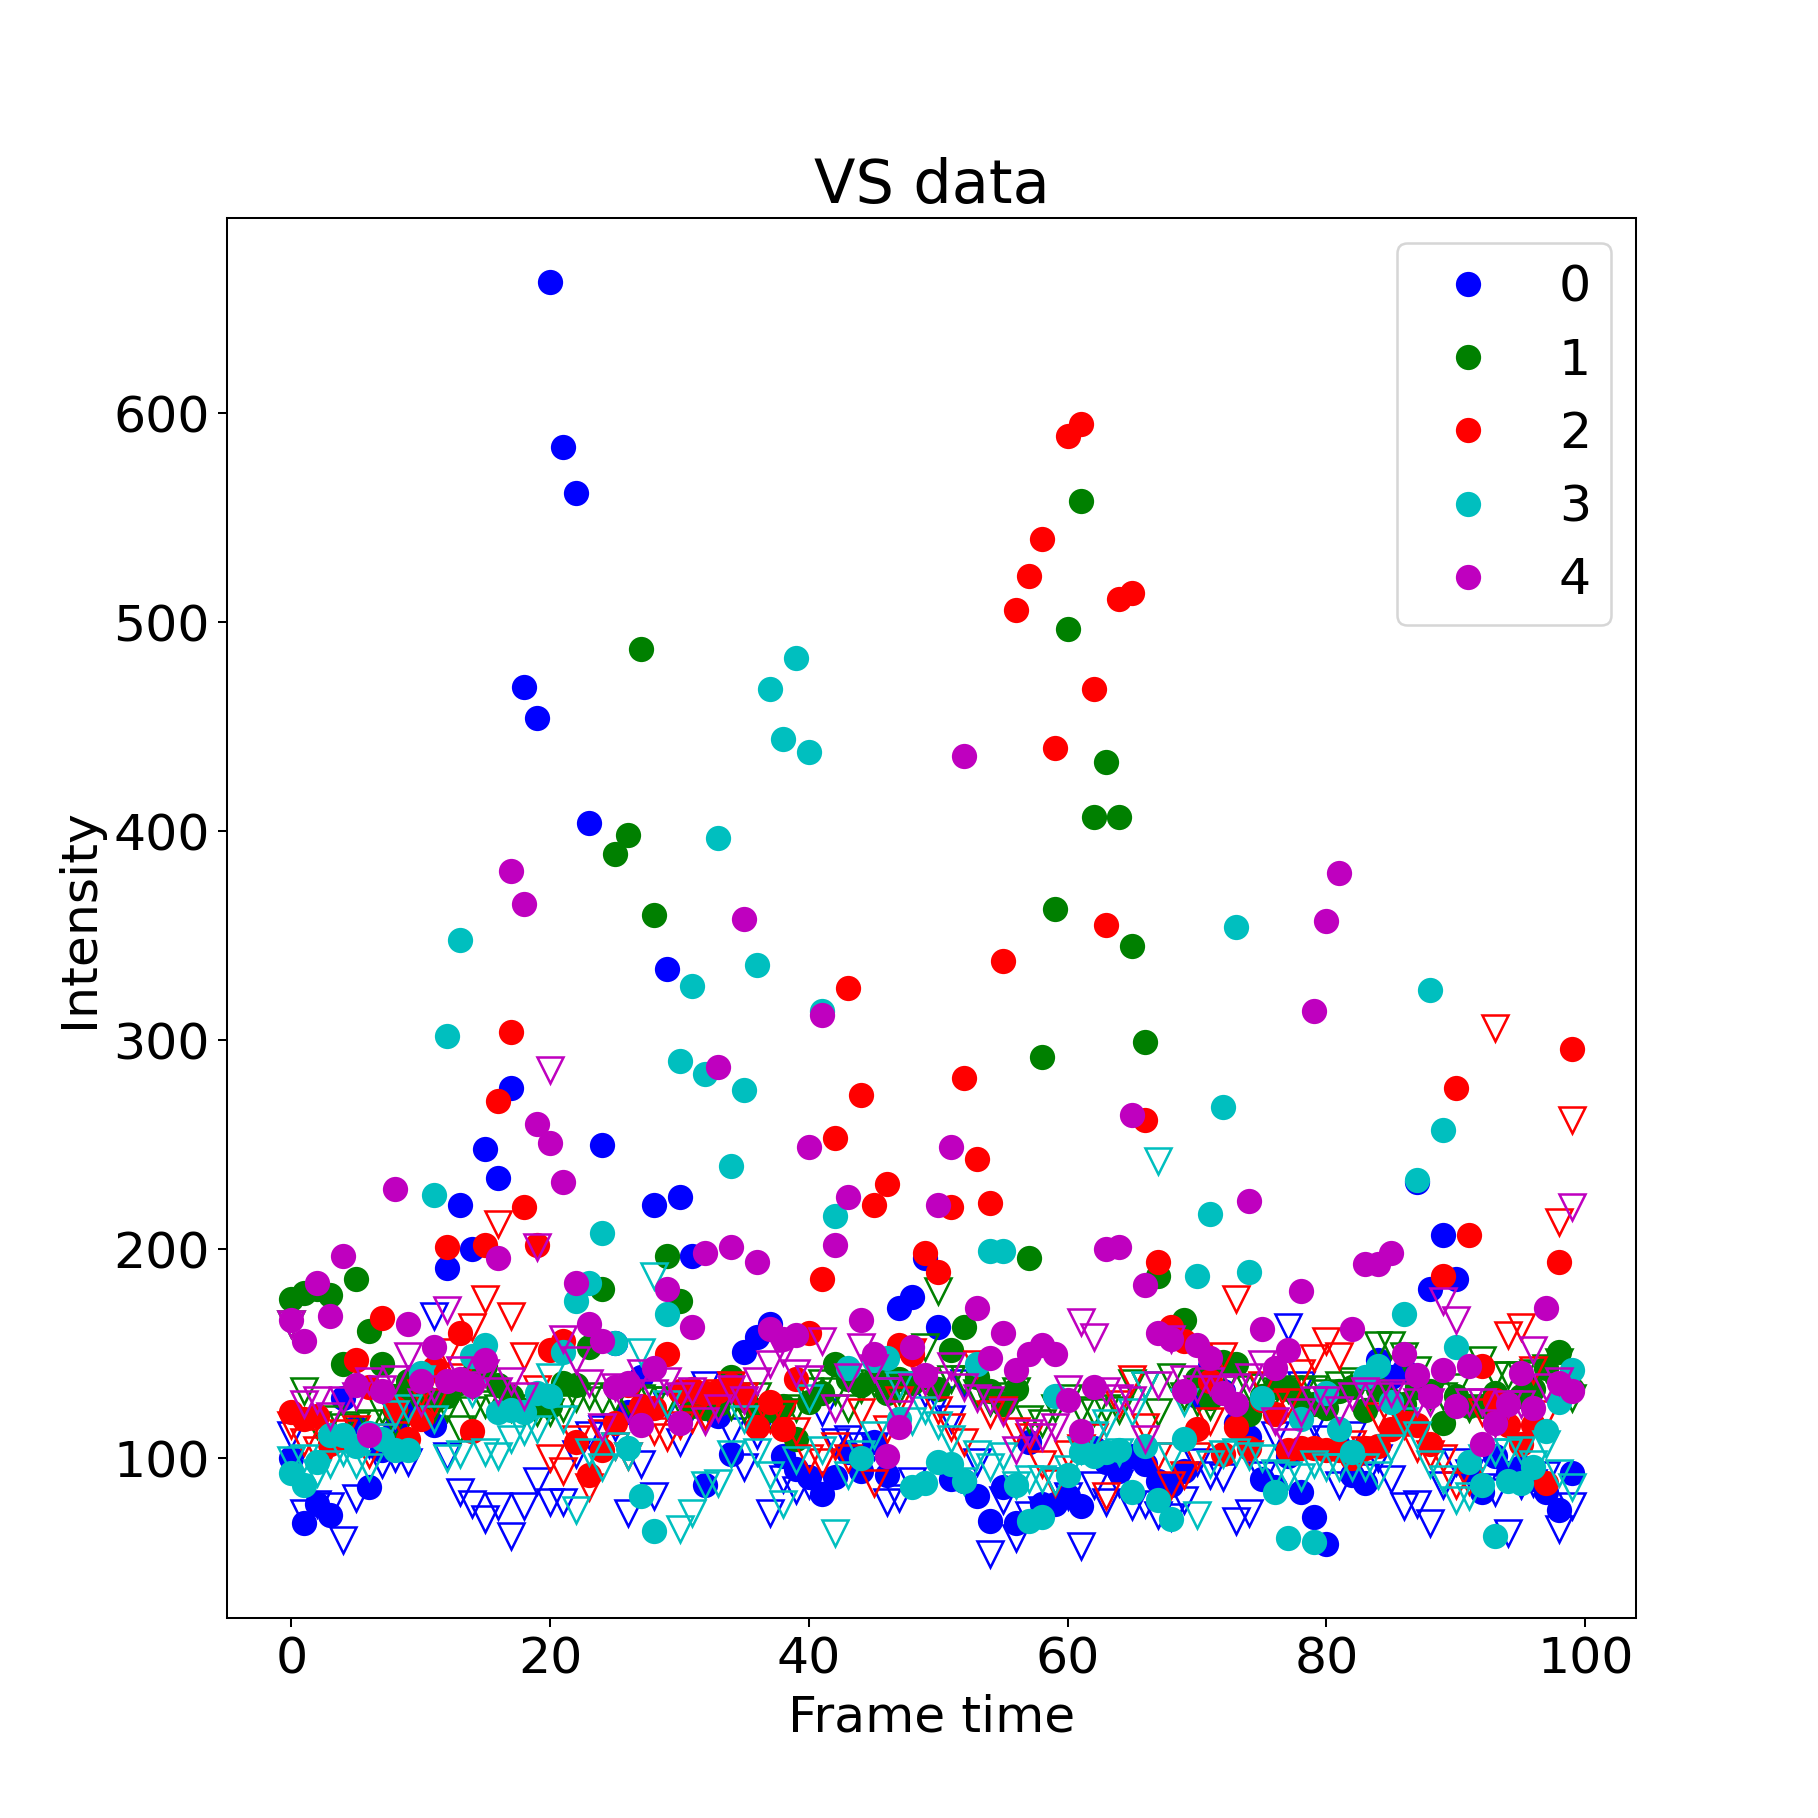

<IPython.core.display.Javascript object>


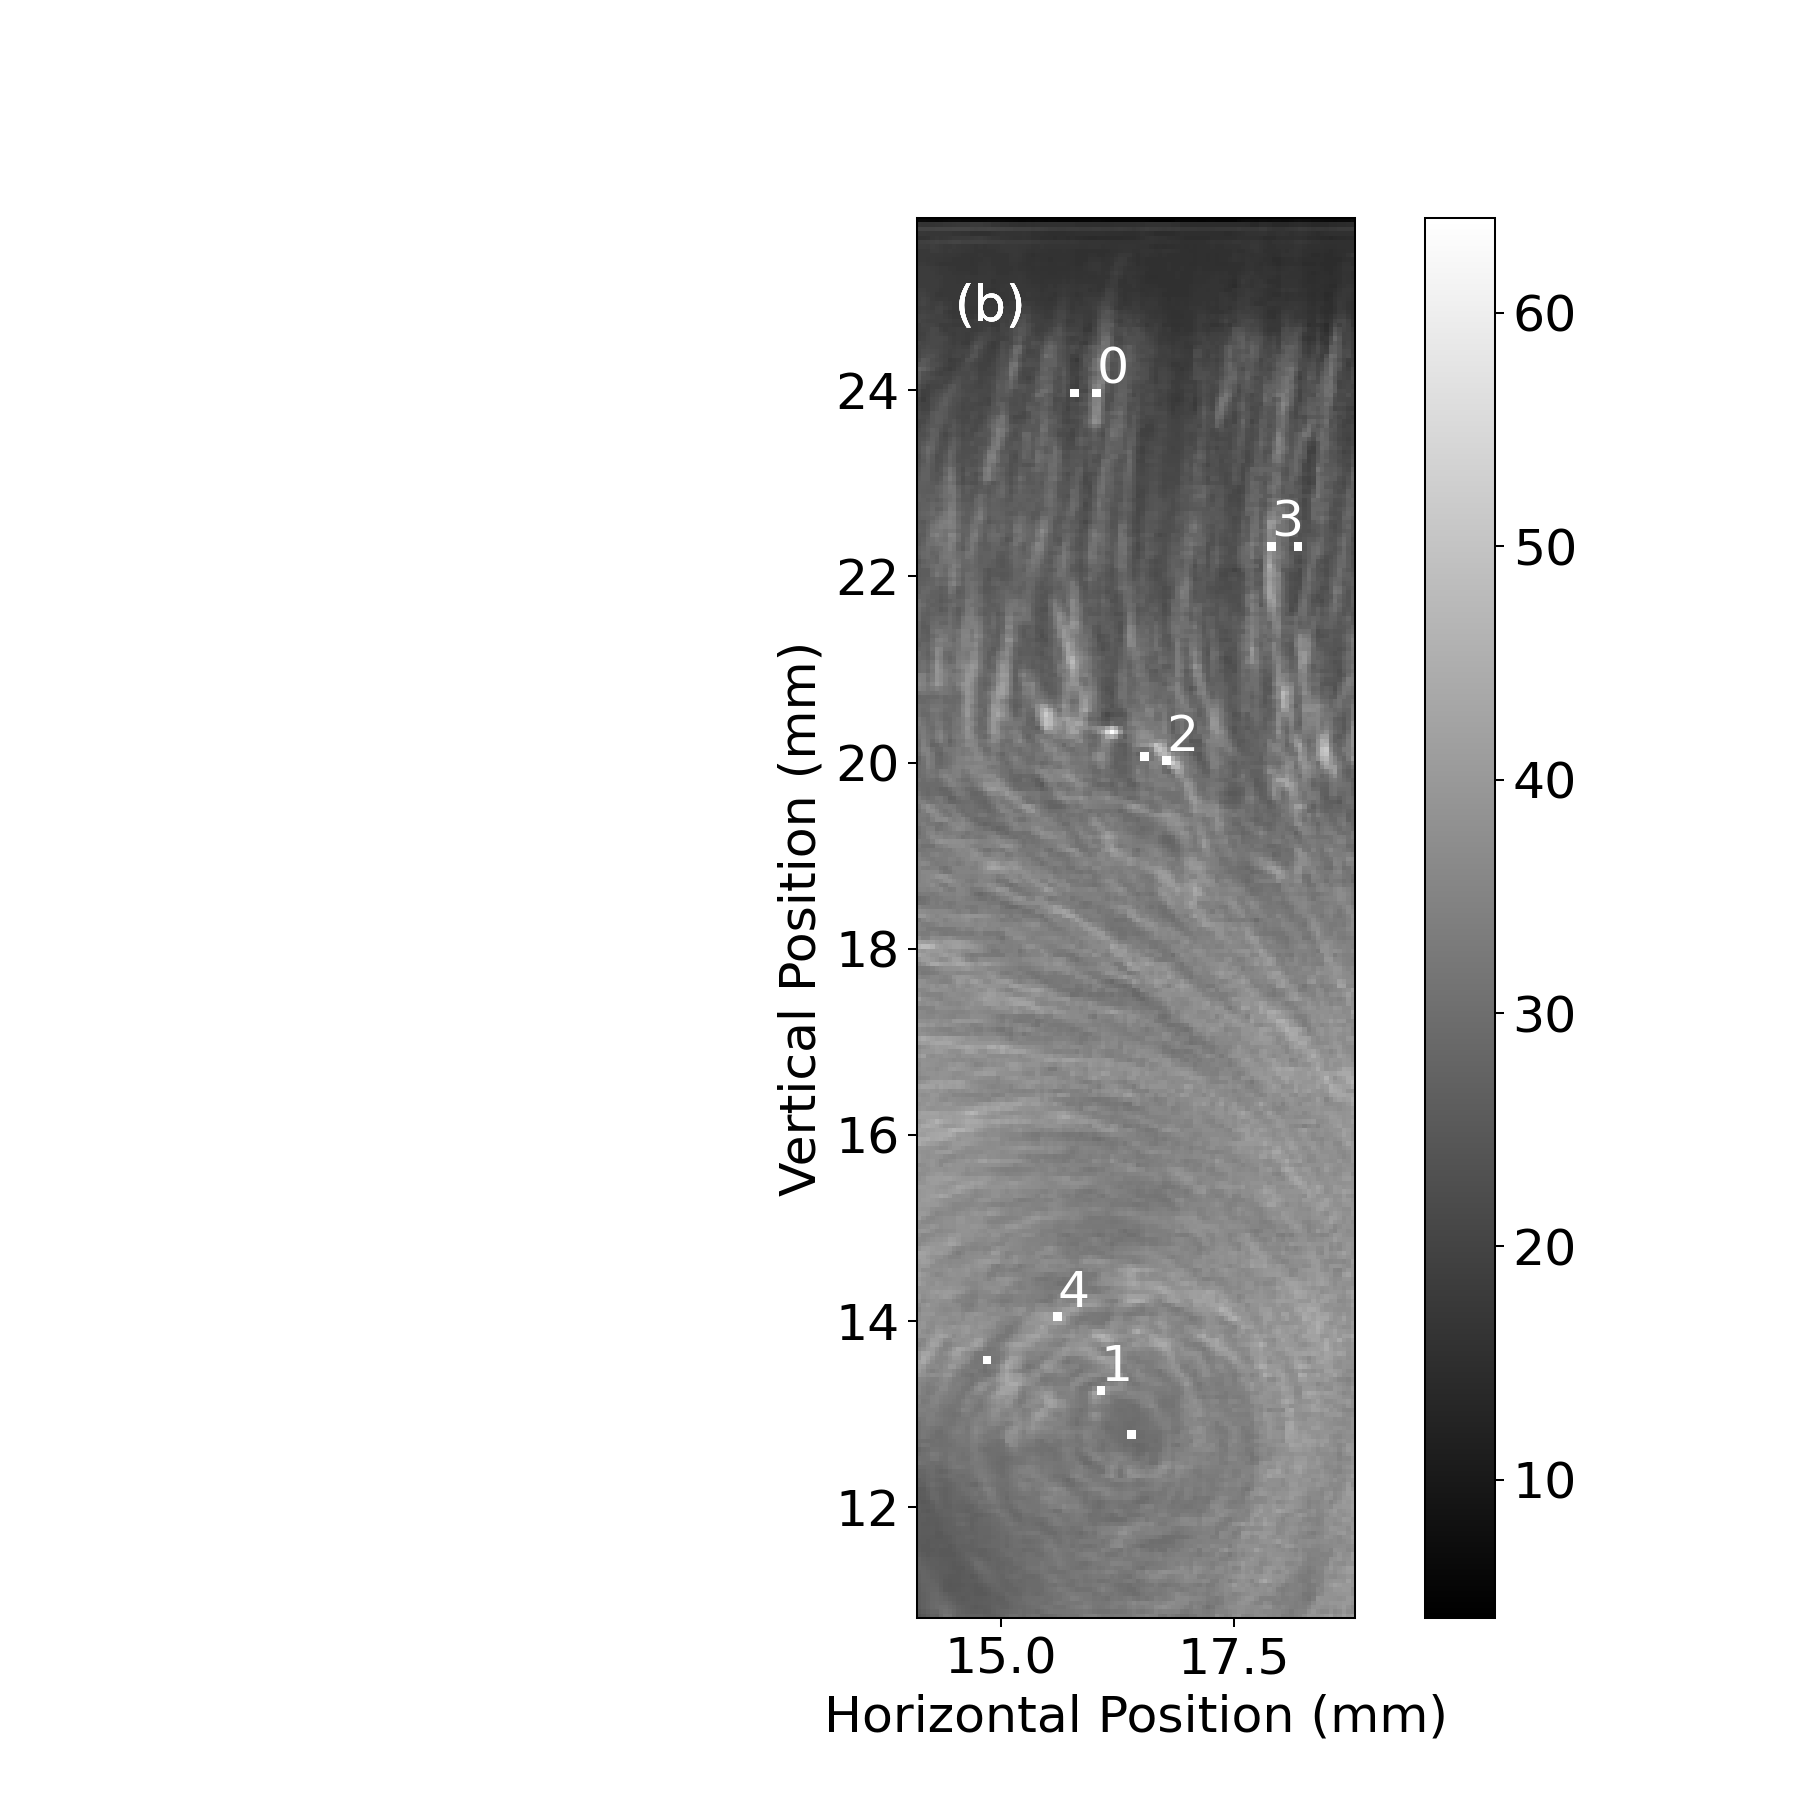

In [333]:

# ROISweetCenter = [[251,332],[40,341],[117,344],[190,388],[75,381],[268,342]]
# ROIDeadCenter =  [[261,316],[40,336],[110,344],[182,387],[75,387],[278,349]]

# ROISweetCenter = [[40,341],[268,342],[190,388],[117,344],[75,381],[251,332]]
# ROIDeadCenter =  [[40,336],[278,349],[182,387],[110,344],[75,387],[261,316]]

ROISweetCenter = [[40,341],[190,388],[268,342],[117,344],[75,381],[251,332]]
ROIDeadCenter =  [[40,336],[182,387],[278,349],[110,344],[75,387],[261,316]]

ROISweetCenter = [[40,341],[190,388],[268,342],[124,357],[75,381],[251,332]]
ROIDeadCenter =  [[40,336],[182,387],[278,349],[123,352],[75,387],[261,316]]
ROISweetCenter = [[40,341],[190,388],[268,342],[124,357],[75,381],[251,332]]
ROIDeadCenter =  [[40,336],[183,387],[278,349],[123,352],[75,387],[261,316]]
ROISweetCenter = [[40,341],[268,342],[124,357],[75,381],[251,332]]
ROIDeadCenter =  [[40,336],[278,349],[123,352],[75,387],[261,316]]

NROIs = len(ROISweetCenter[:])

# Show the ROIs on the image

WithROI = copy.deepcopy(SuperPScaled)

for i in range(NROIs):
    WithROI[ROISweetCenter[i][0]-dp:ROISweetCenter[i][0]+dp,ROISweetCenter[i][1]-dp:ROISweetCenter[i][1]+dp] = np.max(MiniP)
    WithROI[ROIDeadCenter[i][0]-dp:ROIDeadCenter[i][0]+dp,ROIDeadCenter[i][1]-dp:ROIDeadCenter[i][1]+dp] = np.max(MiniP)

MiniP = WithROI[dxMin:dxMax,dyMin:dyMax]

plt.figure(figsize = (10,10))
plt.xlabel('Horizontal Position (pixel)')
plt.ylabel('Vertical Position (pixel)')
plt.title('Raw pixels with origin at top')
plt.imshow(MiniP, cmap='gray')

for i in range(NROIs):
    x = ROISweetCenter[i][0]-dxMin
    y = ROISweetCenter[i][1]-dyMin
    plt.text(y,x,str(i),fontsize=20)
plt.colorbar()
plt.show()


dp = 1 # for 2x2 sized roi

TBins = len(GrayVideo[:,0,0])

Sweet = np.zeros((TBins, NROIs), dtype=np.float32)
Dead = np.zeros((TBins, NROIs), dtype=np.float32)

for i in range(NROIs):
    for j in range(TBins):
        Sweet[j,i] = np.sum(GrayVideo[j,ROISweetCenter[i][0]-dp:ROISweetCenter[i][0]+dp,ROISweetCenter[i][1]-dp:ROISweetCenter[i][1]+dp])
        Dead[j,i]  = np.sum(GrayVideo[j,ROIDeadCenter[i][0] -dp:ROIDeadCenter[i][0] +dp,ROIDeadCenter[i][1] -dp:ROIDeadCenter[i][1] +dp])

# plot the result

plt.figure(figsize = (10,10))
plt.title('VS data')
plt.xlabel('Frame time', fontsize=20)
plt.ylabel('Intensity', fontsize=20)

for i, col in zip(range(NROIs), colors):
    plt.plot(Sweet[:,i], linestyle='None', marker='o', markerfacecolor=col, markeredgecolor='None', markersize=10, label=i)
    plt.plot(Dead[:,i], linestyle='None', marker='v', markerfacecolor='None', markeredgecolor=col, markersize=10)
    
plt.legend(fontsize=20)
plt.show()

# plot the result this time in mm coordinates

plt.figure(figsize = (10,10))
plt.xlabel('Horizontal Position (mm)')
plt.ylabel('Vertical Position (mm)')
plt.imshow(np.flip(MiniP,axis=0), cmap='gray', origin='lower', extent=[yMin,yMax,xMin,xMax])

for i in range(NROIs):

    x = xMax - (ROISweetCenter[i][0]-dxMin)*ConvertPixelTomm 
    y = (ROISweetCenter[i][1]-dyMin)*ConvertPixelTomm + yMin
    plt.text(y,x+.1,str(i),fontsize=20, c = 'white')
#    plt.text(-1.8,2,'(b)',fontsize=20, transform=ax.transAxes, c = 'white')
    plt.text(14.5,24.75,'(b)',fontsize=20, c = 'white')


plt.colorbar()
plt.show()
plt.savefig('Figure10b.pdf')


<IPython.core.display.Javascript object>


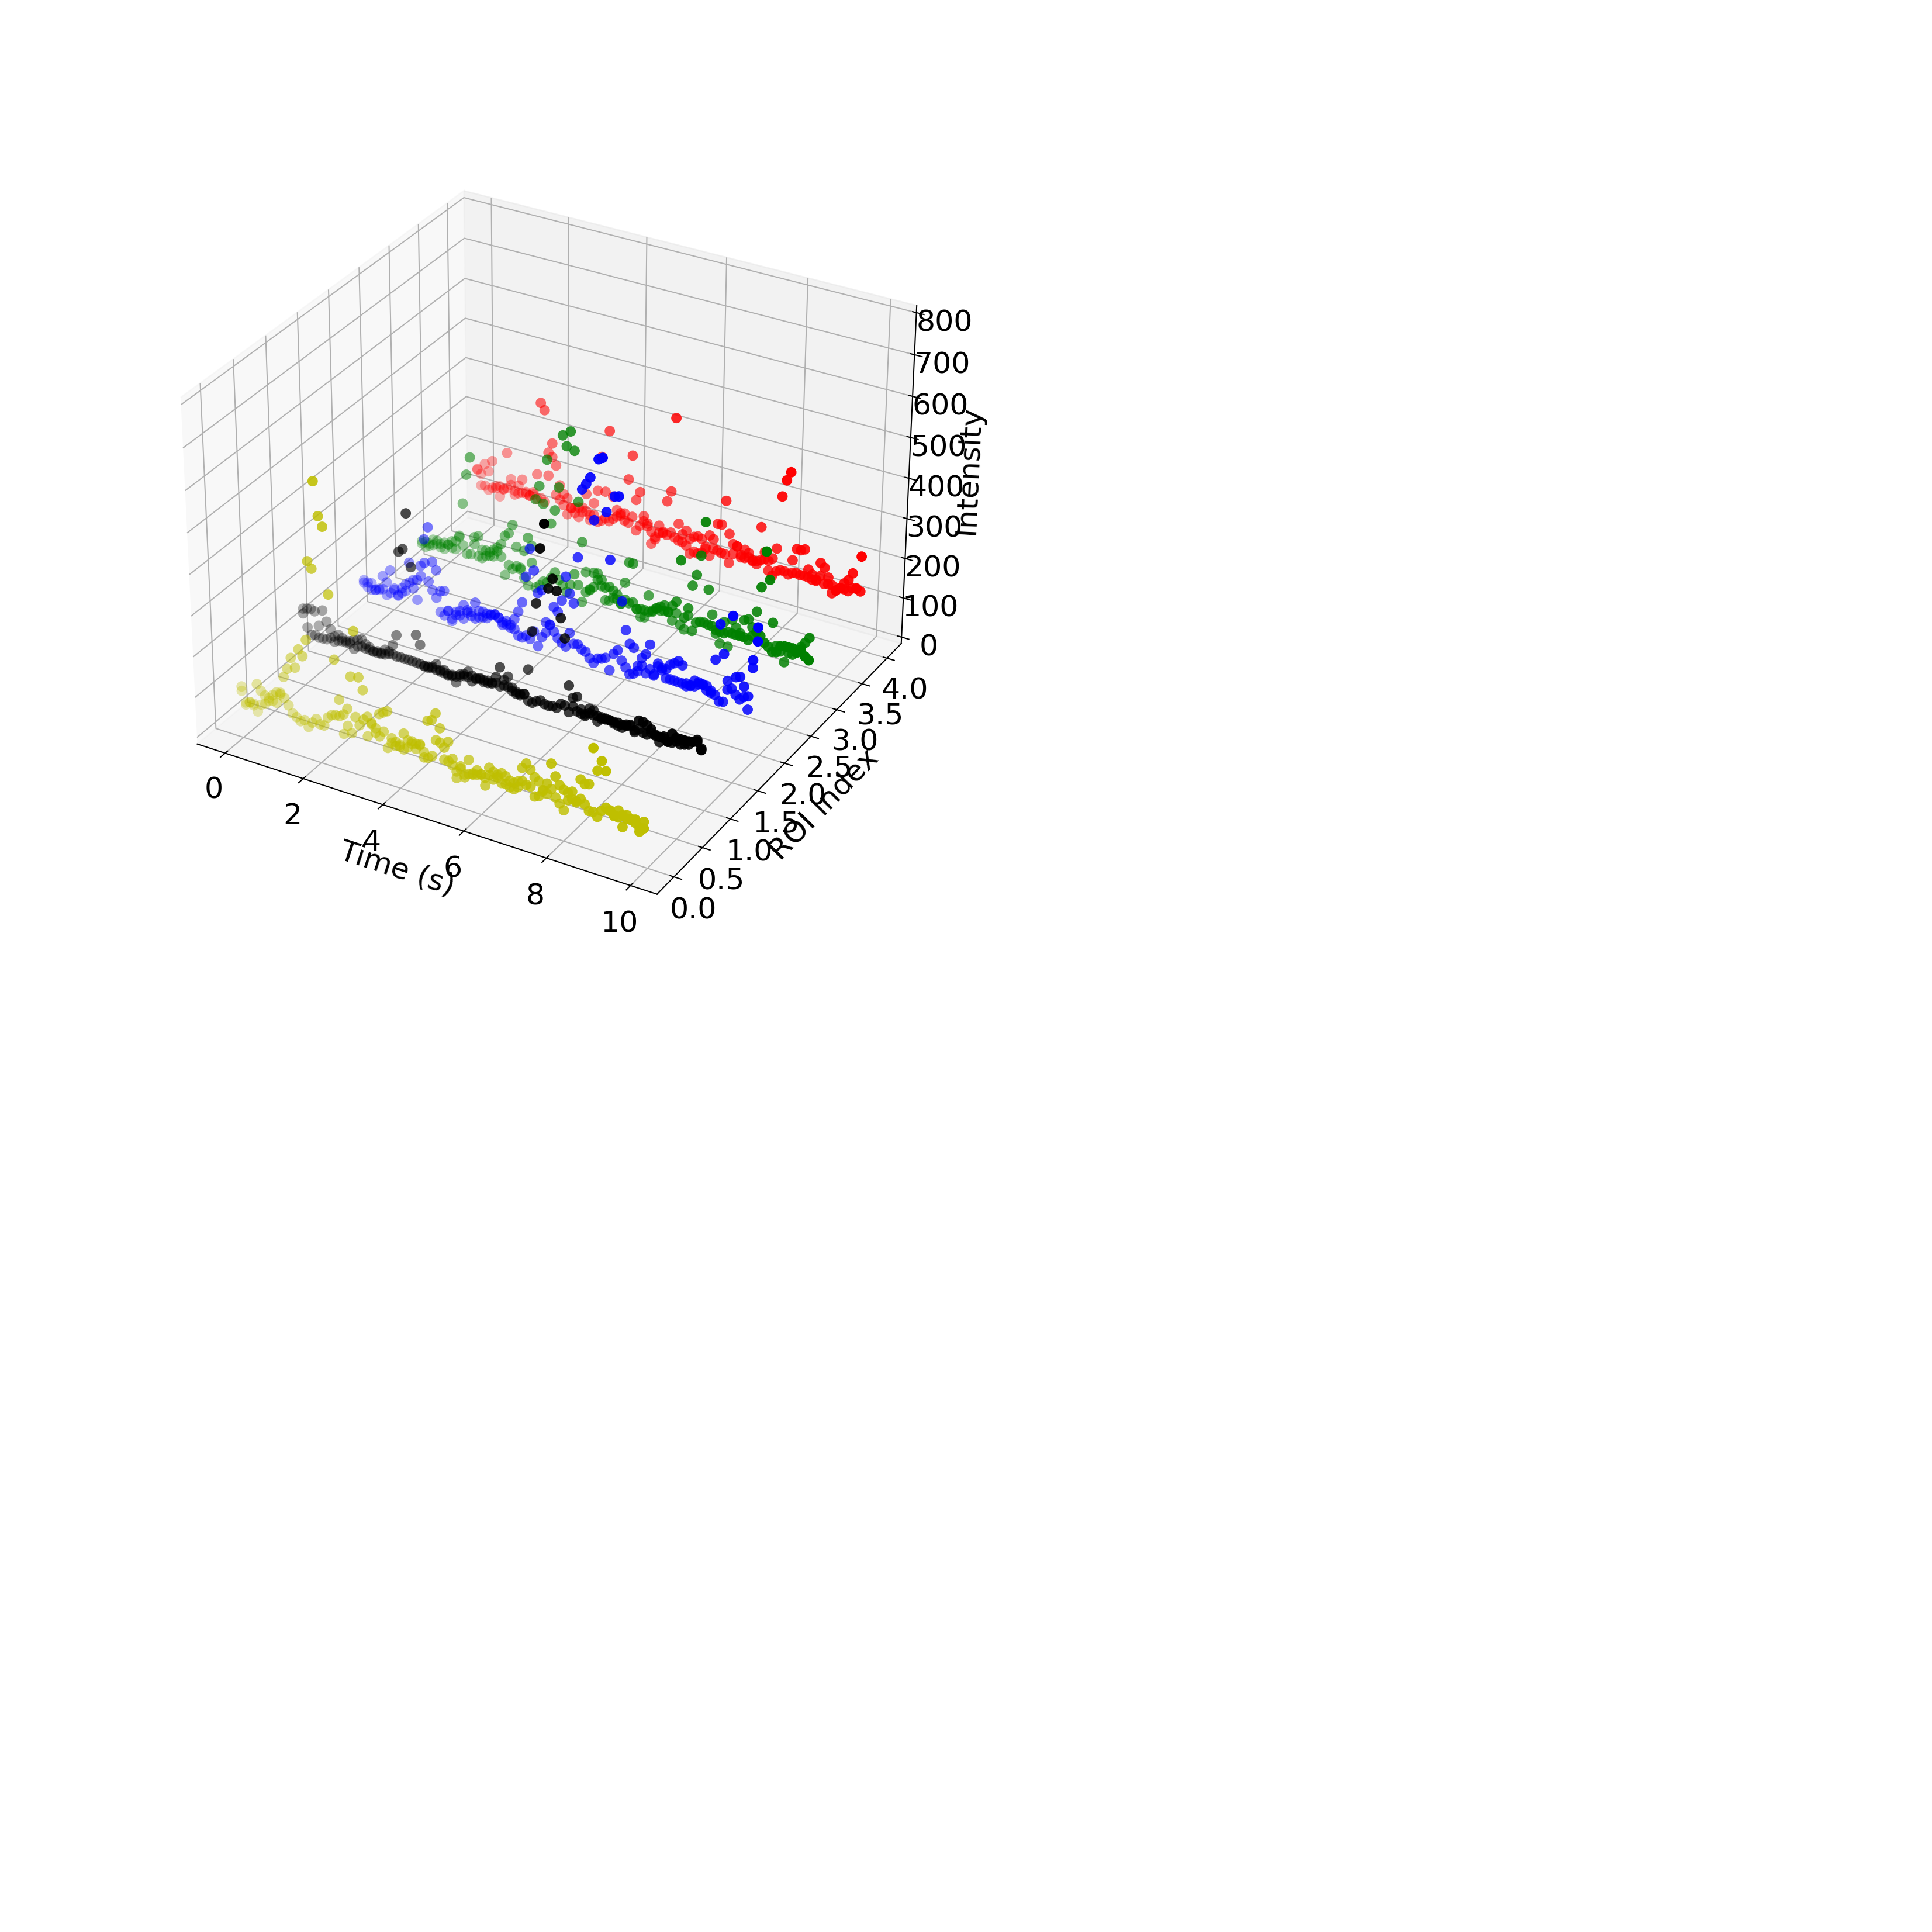

In [334]:

Time = np.arange(0,10,(10-0)/TBins)

NList = np.zeros(TBins)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')


ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('ROI index', fontsize=20)
ax.set_zlabel('Intensity', fontsize=20)
ax.set_zlim3d(0,800)
#plt.title('VS data')
for i, col in zip(range(NROIs), colors):
    NList.fill(i)
#    ax.plot(Time, NList, Sweet[:,i], marker='o', markerfacecolor=col, markeredgecolor='None', markersize=10 )
    ax.scatter3D(Time, NList, Sweet[:,i], marker='o', c=col, edgecolors='None', s=50 )
    ax.scatter3D(Time, NList, Dead[:,i], marker='o', c=col, edgecolors='None', s=50 )

plt.show()


<IPython.core.display.Javascript object>


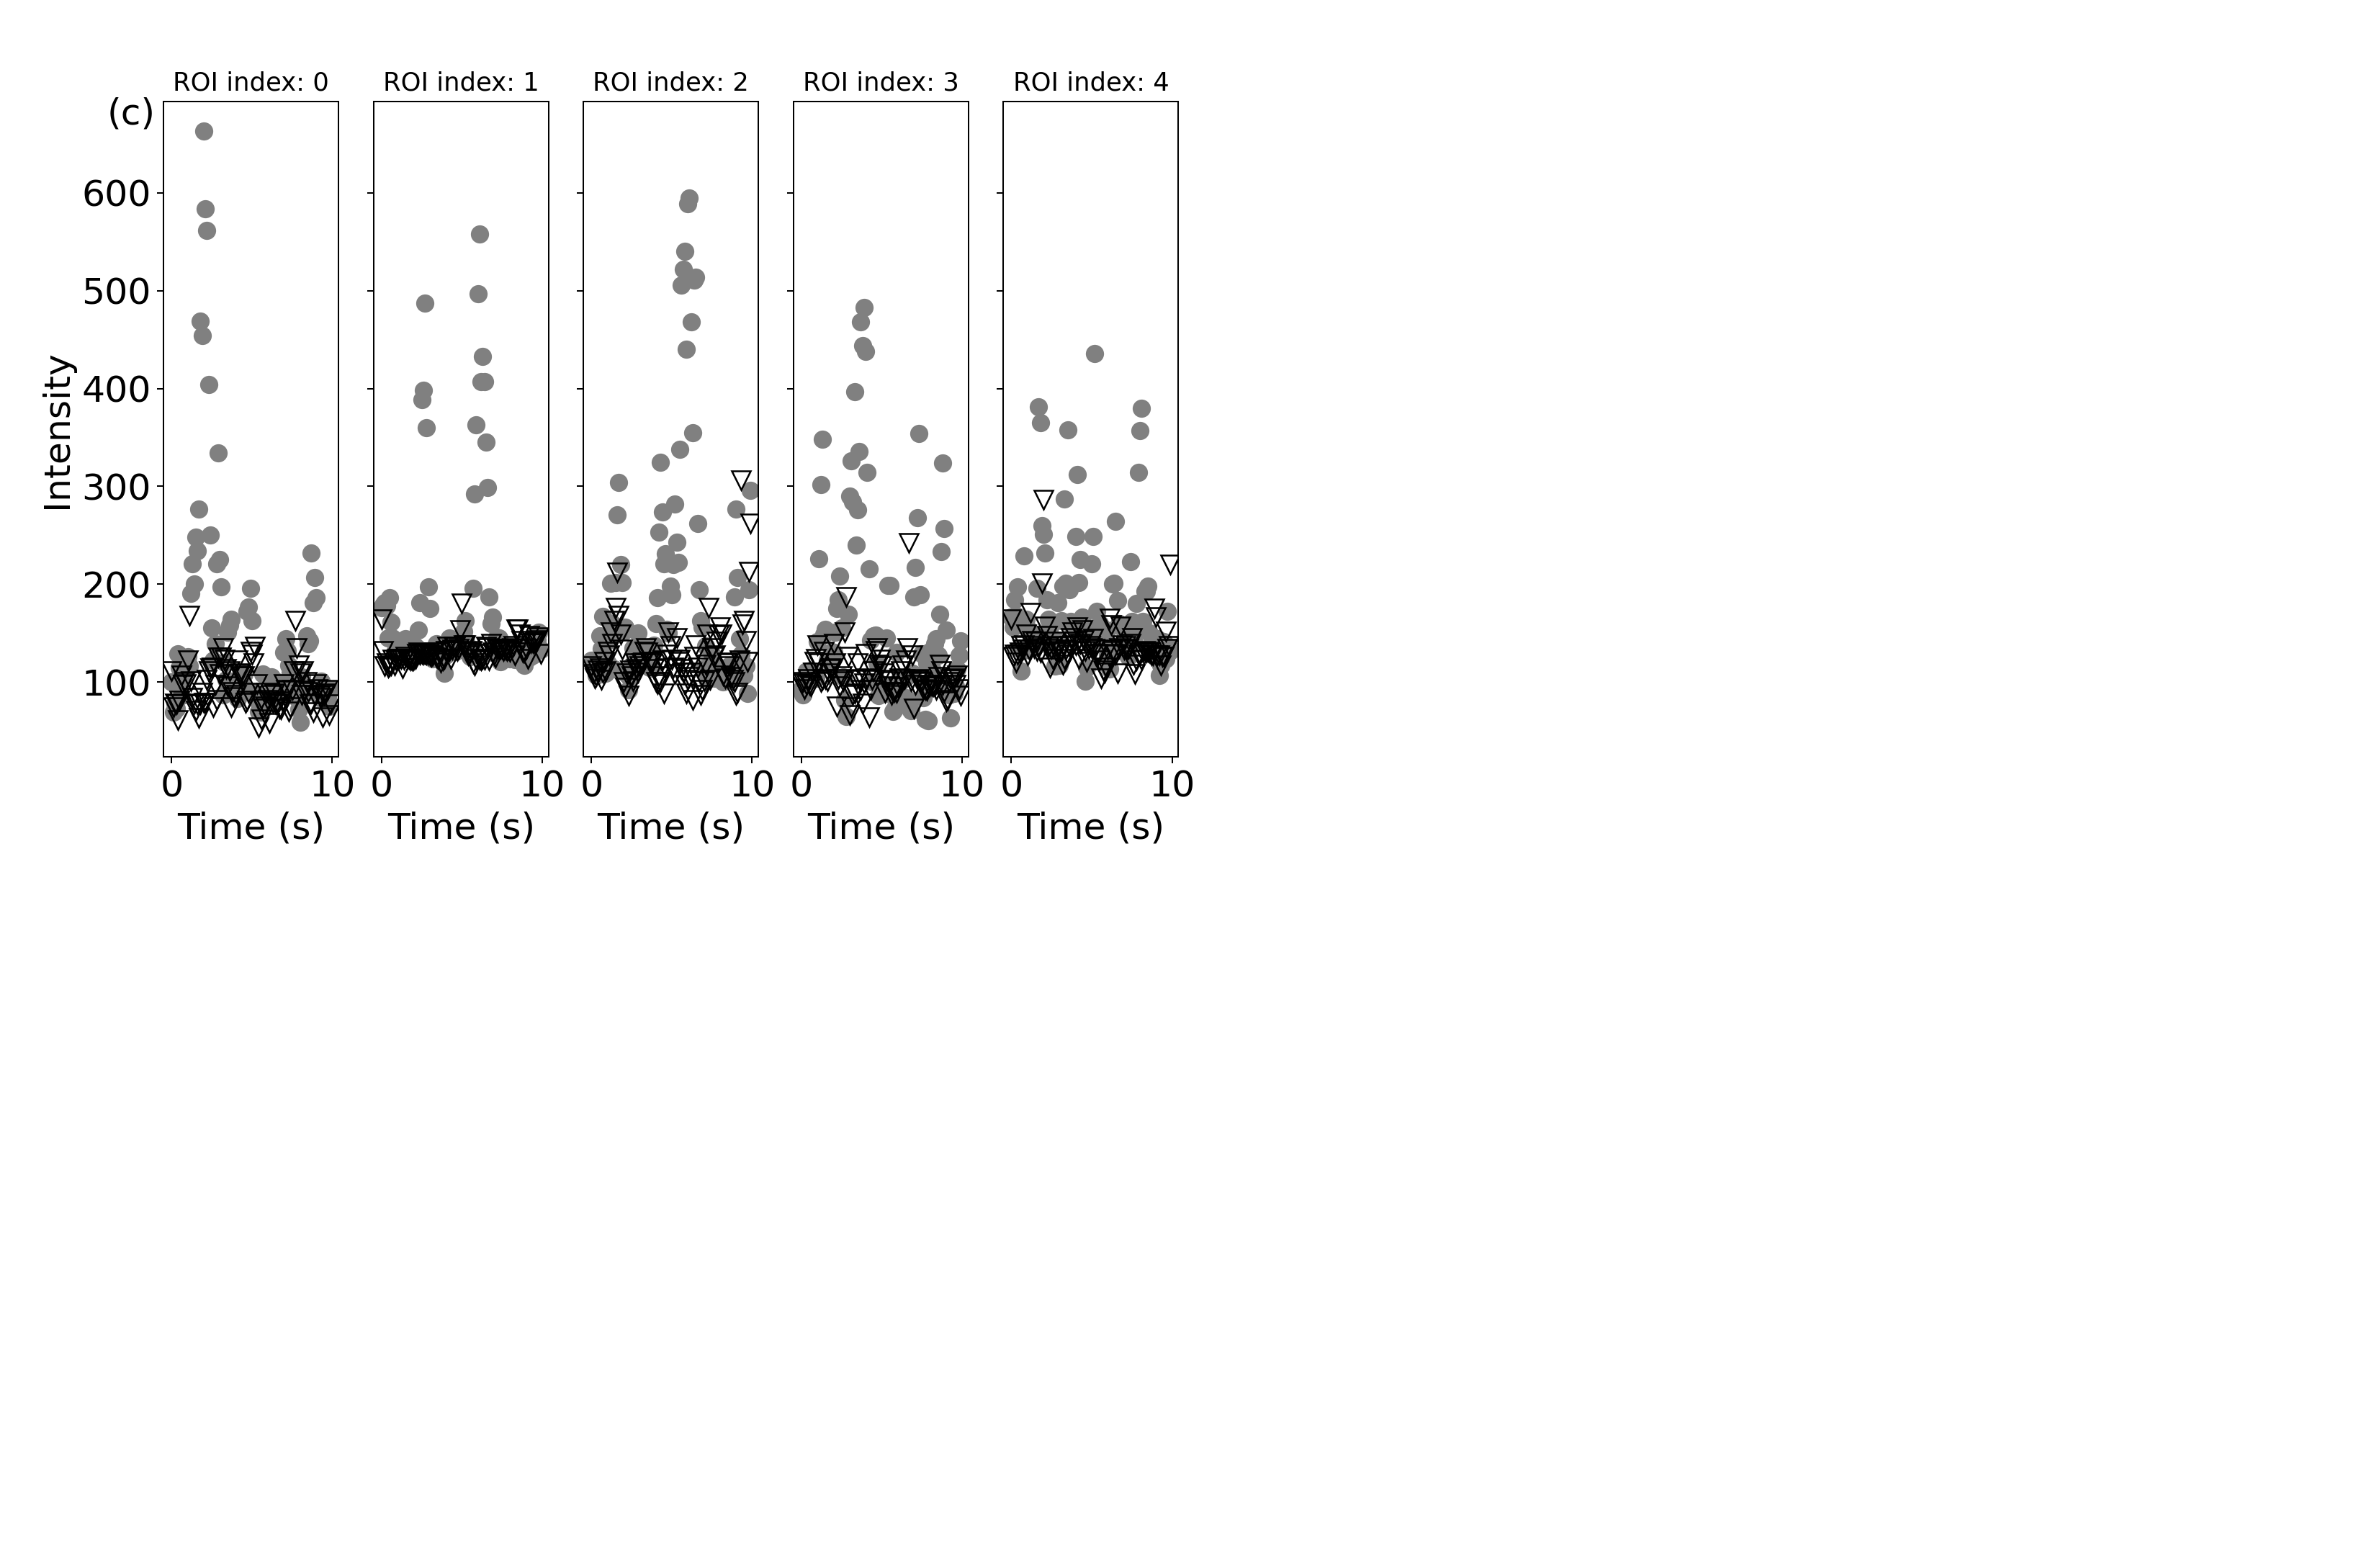

In [335]:
fig, axes = plt.subplots(1, NROIs, figsize=(10,6.5), sharey=True)
for i in range(NROIs):

    ax = axes[i]
#     ax.plot(Sweet[:,i], linestyle='None', marker='o', markerfacecolor=col, markeredgecolor='None', markersize=10, label=i)
#     ax.plot(Dead[:,i], linestyle='None', marker='v', markerfacecolor='None', markeredgecolor=col, markersize=10)
    if i == 0:
        ax.set_ylabel('Intensity')
        ax.text(-4,670,'(c)',fontsize=20, c = 'black')

    ax.plot(Time,Sweet[:,i], linestyle='None', marker='o', markerfacecolor='gray', markeredgecolor='None', markersize=10, label=i)
    ax.plot(Time,Dead[:,i], linestyle='None', marker='v', markerfacecolor='None', markeredgecolor='k', markersize=10)
    ax.set_title('ROI index: '+str(i), weight=500, size=14, loc="center") 
    ax.set_xlabel('Time (s)')

plt.show()
plt.savefig('Figure10c.pdf')


In [336]:
# def adjust_axis_layout(ax, title):
#     ax.tick_params(axis="both", which="both", length=0)

#     ax.set_xticks([-2, 0, 2], minor=False)
#     ax.set_xticklabels([-2, 0, 2], minor=False, size=11, color="0.3")
#     ax.set_xticks([-3, -1, 1, 3], minor=True)
#     ax.set_xlim(-3.1, 3.1)
#     ax.xaxis.grid(True, which="both", color="#cccccc", alpha=0.8, lw=0.5)

#     ax.set_yticks([0.2, 0.4, 0.6], minor=False)
#     ax.set_yticklabels([0.2, 0.4, 0.6], minor=False, size=11, color="0.3")
#     ax.set_yticks([0.1, 0.3, 0.5, 0.7], minor=True)
#     ax.yaxis.grid(True, which="both", color="#cccccc", alpha=0.8, lw=0.5)

#     for spine in ["top", "right", "bottom", "left"]:
#         ax.spines[spine].set_visible(False)

#     ax.set_title(title, weight=500, size=14, loc="left") 
    
#     return ax

# From original VS movie i measured speeds of 4 tracers in regions close to our ROIs.  I found 4,4,8,10 mm/s.